# Notas originales: [12 steps to N-S](https://www.theoj.org/jose-papers/jose.00021/10.21105.jose.00021.pdf)

#Ecuación de difusión 1D
-------
La ecuacion de difusión la encontramos en diferentes capos de la física. 
Si analizamos una función de densidad local de partículas $\rho$, ésta obedece una relación
\begin{equation}
\frac{\partial \rho}{\partial t} = - \nabla \cdot \mathbf{j}
\end{equation}
donde $\mathbf{j}$ es una densidad de flujo de corriente. También se conoce ésta interpretación como aproximación de Fick. En ésta describimos el desplazamiento natural de los sistemas de lugarres de mayor concentración a menor concentración.
\begin{equation}
\frac{\partial u}{\partial t} = D_{0} \nabla^{2} \rho
\end{equation}

La ecuación de difusión en una dimension tiene la forma
\begin{equation}
\frac{\partial u}{\partial t} = \nu \frac{\partial^2 u}{\partial x^2},
\end{equation}
donde $v$ es el coeficiente de difusión. En ésta ocación tenemos una segunda derivada en juego, y como tal debemos discretizarl de manera apropiada. Consideramos la expansión en series de Taylor para una variación hacia adelante $+\Delta x$ y otra para hacia atras $-\Delta x$ tal que

\begin{equation}
u_{i+1} = u_i + \left( \frac{\partial u}{\partial x} \right)_i \Delta x + \frac{1}{2} \left( \frac{\partial^2 u}{\partial x^2} \right)_i \Delta x^2 + \frac{1}{6} \left( \frac{\partial^3 u}{\partial x^3} \right)_i \Delta x^3 + O(\Delta x^4),
\end{equation}
\begin{equation}
u_{i-1} = u_i - \left( \frac{\partial u}{\partial x} \right)_i \Delta x + \frac{1}{2} \left( \frac{\partial^2 u}{\partial x^2} \right)_i \Delta x^2 - \frac{1}{6} \left( \frac{\partial^3 u}{\partial x^3} \right)_i \Delta x^3 + O(\Delta x^4),
\end{equation}
al sumar estas dos cantidades y despejar el símbolo de segunda derivada evaluada en el punto $x_i$ obtenemos
\begin{equation}
\left( \frac{\partial^2 u}{\partial x^2} \right) = \frac{u_{i+1}-2u_i+u_{i-1}}{\Delta x^2} + O(\Delta x^2),
\end{equation}
con esto podemos discretizar la ecuación de difusion en una dimensión
\begin{equation}
\frac{u^{n+1}_{i} - u^{n}_{i}}{\Delta t} = \nu \frac{u^{n}_{i+1}-2u^{n}_{i} + u^{n}_{i-1}}{\Delta x^2},
\end{equation}
teniendo una condición inicial, la unica incognita en la ecuacion es $u^{n+1}_{i}$, despejando para esta incognita

\begin{equation}
u^{n+1}_{i} = u^{n}_{i} + \frac{\nu \Delta t}{\Delta x^{2}} (u^{n}_{i+1}-2u^{n}_{i} + u^{n}_{i-1}),
\end{equation}
la ultima ecuación nos permite avanzar en el tiempo dada una condición inicial.

Realizamos un ejemplo con la función pulso.

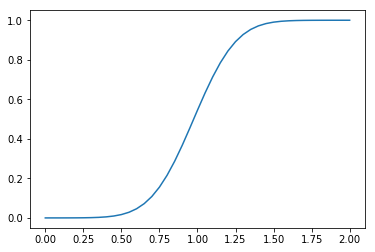

In [0]:
import numpy as np #importa numpy.
import matplotlib.pyplot as plt #importa la herramienta para graficar
%matplotlib inline
#hace que las gráficas aparescan en la siguiente linea

def pulso(x0, x1, x): #define la función pulso
  if x < x0 or x > x1:
    return(0.0)
  else:
    return(1.0)

L = 2 #el tamaño de nuestro intervalo en x
nx = 41
dx = L/(nx-1) #la distancia que hay entre cada punto discretizado x (dx)
T = 1.0 #intervalo total de tiempo
nt = 2000 #número de veces que se discretiza la variable tiempo
c = 1.0 #velocidad de la onda (e.d.)
nu = 0.3 #viscocidad
sigmamax = 0.1
dt = dx*sigmamax/nu
  

u = np.linspace(0, L, nx) #np.linspace genera un vector con nx entradas que contiene números igualmente espaciados en un intervalo (0,L)
x = np.linspace(0, L, nx) #generamos dos porque uno va a entrar a la funcion pulso

for i in range(len(x)):
  u[i] = pulso(1.0, 2.0, x[i])


un = np.zeros(nx) #crea un vector temporal de tamaño nx con entradas ceros  
for n in range(nt): #genera el loop nt veces
  un = u.copy() #copia los elementos de u al vector temporal un
  for i in range(1,nx-1): #el loop realiza las operaciones para calcular el u^{n+1}_{i}, pero comienza con el elemento u[1] y no u[o] (se salta el primer elemento)
    u[i] = un[i] + nu*dt*(un[i+1]-2.0*un[i] + un[i-1])/dx*dx

plt.plot(x,u)